# Importing Libraries And Getting Data

In [395]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df=pd.read_csv(r"C:\Users\aumee\Downloads\layoffs.csv")

# Data Cleanup 

In [397]:
def change(x):
    if isinstance(x, str) and 'Crypto' in x:
        return 'Crypto'
    return x
df['industry'] = df['industry'].apply(change)

def change2(x):
    if 'Unknown' in x:
        return np.nan
    else :
        return x
df['stage']=df['stage'].astype(str).apply(change2)

def change3(x):
    if 'United States' in x:
        return 'United States'
    return x
df['country'] = df['country'].apply(change3)

df['date']=pd.to_datetime(df['date'])


# Validating Cleanup

In [ ]:
df['country'].value_counts().sort_index()
df['stage'].value_counts().sort_index()
df['industry'].value_counts().sort_index()


# EDA (Exploratory Data Analysis)

Text(0.5, 1.0, 'Top Locations ')

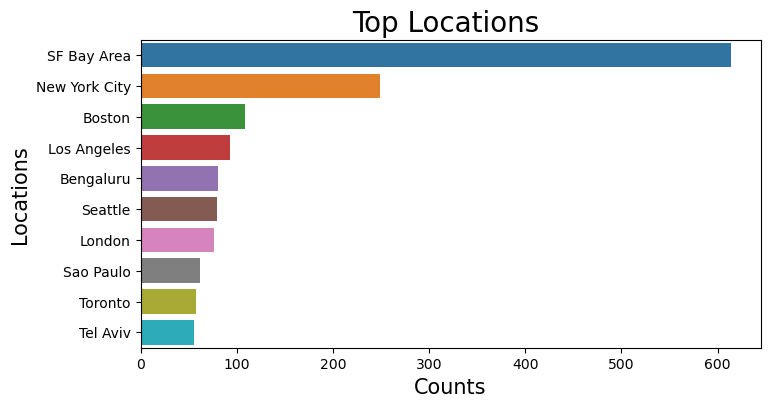

In [399]:
plot1=df['location'].value_counts().sort_values(ascending=False).reset_index(name='values').head(10)
plt.figure(figsize=(8,4))
sns.barplot(data=plot1,x='values',y='index',orient='horizontal',hue='index',legend=False)
plt.ylabel('Locations',size=15)
plt.xlabel('Counts',size=15)
plt.title('Top Locations ',size=20)

Text(0.5, 1.0, 'Top Companies ')

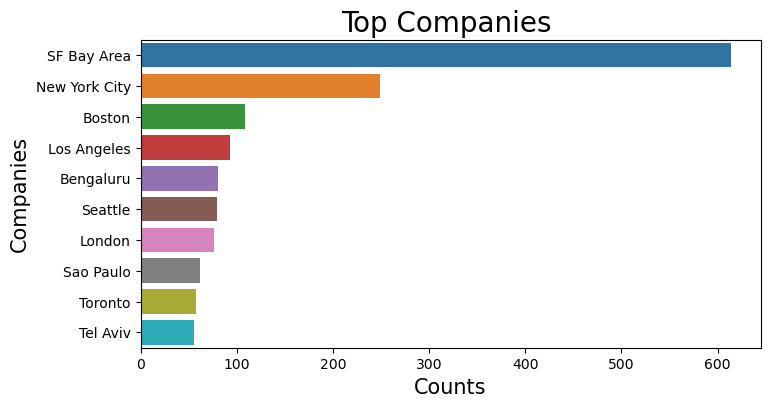

In [401]:
plot2=df['company'].value_counts().sort_values(ascending=False).reset_index(name='values').head(10)
plt.figure(figsize=(8,4))
sns.barplot(data=plot1,x='values',y='index',orient='horizontal',hue='index',legend=False)
plt.ylabel('Companies',size=15)
plt.xlabel('Counts',size=15)
plt.title('Top Companies ',size=20)


# How has the percentage of layoffs varied across different industries?

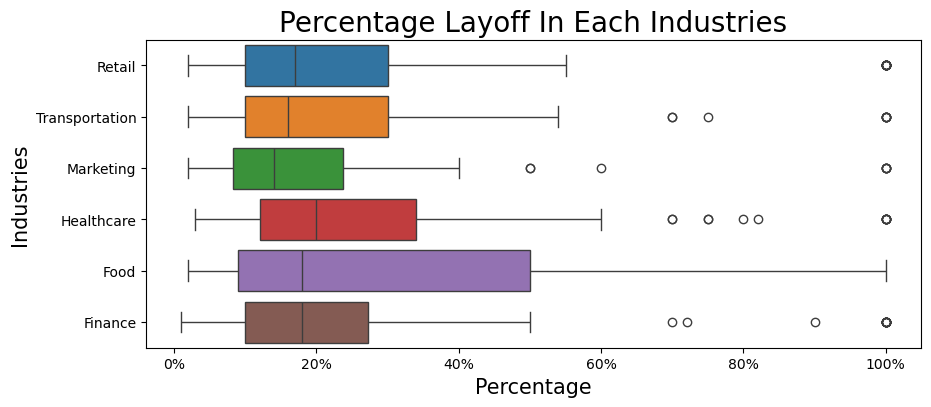

In [407]:
plot3= df['industry'].value_counts().head(6)
top_industries = plot3.index.tolist()
df_filtered = df[df['industry'].isin(top_industries)].copy()
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_filtered, x='percentage_laid_off',y='industry',hue='industry',legend=False)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*100:.0f}%'))
plt.ylabel('Industries',size=15)
plt.xlabel('Percentage',size=15)
plt.title('Percentage Layoff In Each Industries',size=20)
plt.show()



# How have layoffs varied throughout the year?

In [409]:
df['month'] = df['date'].dt.month

Text(0.5, 0, 'Months')

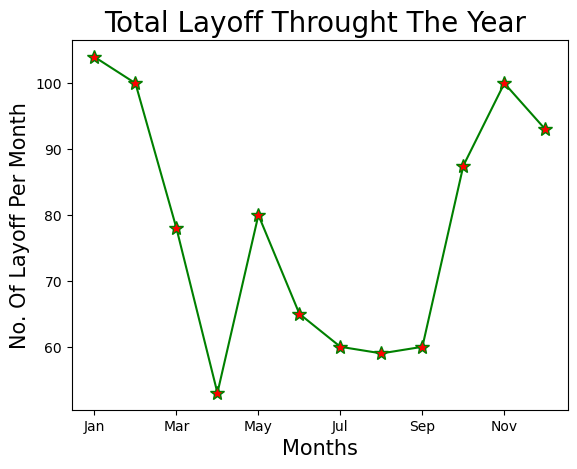

In [411]:
plot4=df.groupby('month')['total_laid_off'].median().reset_index()
plot['month_name'] = plot['month'].apply(lambda x: pd.to_datetime(x,format='%m').strftime('%b'))
plot.plot(kind='line',x='month_name',y='total_laid_off',color='green',marker='*',markerfacecolor='red',markersize=10,legend=False)
plt.title('Total Layoff Throught The Year ',size=20)
plt.ylabel('No. Of Layoff Per Month',size=15)
plt.xlabel('Months',size=15)

# How have companies raised funds from different sources?

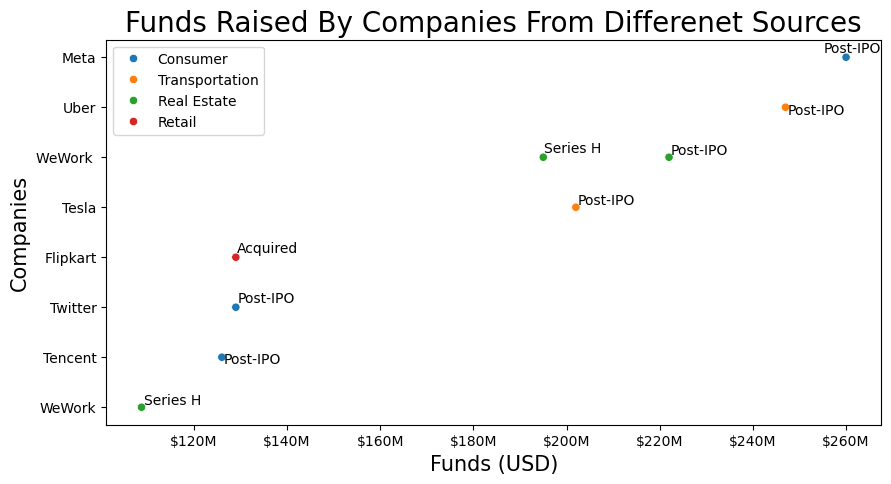

In [413]:
plot5 = df.groupby(['company', 'stage'])['funds_raised_millions'].median().sort_values(ascending=False).head(10)[1:].reset_index(name='Funds')
temp_df = df[['industry', 'company']].drop_duplicates()
final_plot = plot5.merge(temp_df, how='inner')

plt.figure(figsize=(10,5))
sns.scatterplot(data=final_plot, x='Funds', y='company', hue='industry', legend=True)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x / 100)}M'))

from adjustText import adjust_text
texts = []

for i, row in final_plot.iterrows():
    company = row['company']
    stage = row['stage']
    funds = row['Funds']
    texts.append(plt.text(funds, company, stage))

adjust_text(texts)
plt.legend(loc='upper left')
plt.ylabel('Companies' ,size=15)
plt.xlabel('Funds (USD)' ,size=15)
plt.title('Funds Raised By Companies From Differenet Sources' ,size=20)
plt.show()
